In [38]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# visualization
import matplotlib.pyplot as plt
import seaborn as sns


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [24]:
# Separate the data into labels and features
target = df.loan_status
features = df.drop(columns=['loan_status'])
# Separate the y variable, the labels
y = target

# Separate the X variable, the features
X = features

In [25]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [26]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [27]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [28]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [29]:
model = LogisticRegression(random_state = 1)
lrmodel = model.fit(X_train, y_train)

C:\Users\vsanh\anaconda3\envs\dev\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [31]:
#  Saving predictions
y_pred = lrmodel.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [32]:
# Generate and print confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels=None, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

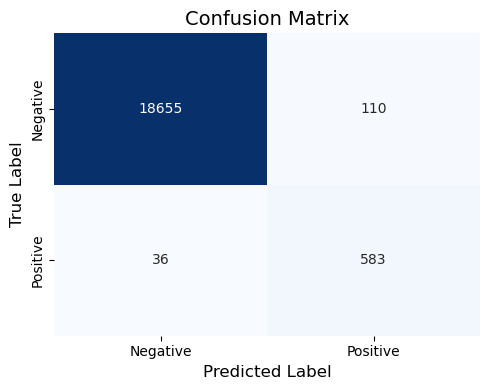

In [33]:
plot_confusion_matrix(y_test, y_pred, labels=['Negative', 'Positive'])

In [36]:
# CLassification Model
def print_classification_report(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    
    styled_report = report_df.style \
        .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score']) \
        .format({'precision': '{:.2f}', 'recall': '{:.2f}', 'f1-score': '{:.2f}', 'support': '{:.0f}'}) \
        .set_caption("📋 Classification Report")

    return styled_report


In [37]:
print_classification_report(y_test, y_pred)


,precision,recall,f1-score,support
0,1.00,0.99,1.00,18765
1,0.84,0.94,0.89,619
accuracy,0.99,0.99,0.99,1
macro avg,0.92,0.97,0.94,19384
weighted avg,0.99,0.99,0.99,19384


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model seems to perform very well overall, but its ability to correctly identify high-risk loans (1) appears to be weaker than its performance with healthy loans (0). Specifically, precision and recall values for the high-risk loan class are lower than for healthy loans, which suggests that the model is struggling to correctly identify high-risk loans in some cases. This could be attributed to a class imbalance in the dataset, where healthy loans (0) are more prevalent than high-risk loans (1).

The confusion matrix confirms this, showing a bit of a data imabalance within the numbers, such as healthy loans having ocer 18,000 instances of data, and high-risk loans only having over 600. Additionally, the random state used in splitting the data could influence the model’s performance, as different splits might lead to slight variations in how well the model generalizes to the test data.

Overall, the model performs very well, and is far from disappointing!


---